In [293]:
import yfinance as yf
import matplotlib.pyplot as plt

In [294]:
apple_stock=yf.download("AAPL",auto_adjust=True)
print(apple_stock.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-07-14  208.383499  210.670912  207.304722  209.692012  38840100
2025-07-15  208.872955  211.649803  208.683168  208.982831  42296300
2025-07-16  209.921768  212.159219  208.403487  210.061609  47490500
2025-07-17  209.781921  211.559902  209.352401  210.331301  48068100
2025-07-18  210.940598  211.549907  209.462280  210.630951  48974600


In [295]:
#checking null values
apple_stock.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [296]:
#shape
apple_stock.shape

(22, 5)

In [297]:
X=apple_stock.drop('Close',axis=1)
y=apple_stock['Close']

In [298]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Random forest regressor

In [300]:
#random forest implementation
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train.squeeze()) #squeeze to remove y_train one dimension

RandomForestRegressor()

In [301]:
#score
print('score is ',rf.score(X_test,y_test))

score is  0.8253179135238825


In [302]:
y_pred=rf.predict(X_test)

In [303]:
from sklearn.metrics import mean_absolute_error,r2_score
error=mean_absolute_error(y_pred,y_test)
r2score=r2_score(y_pred,y_test)
print('mean absolute error of random forest is ',error)
print('r2score of random forest is ',r2score)

mean absolute error of random forest is  1.0611922302246057
r2score of random forest is  0.7963762587661128


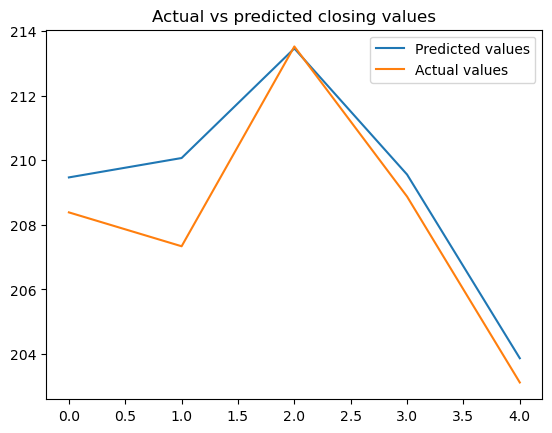

In [304]:
plt.plot(y_pred,label='Predicted values')
plt.plot(y_test.values,label='Actual values')
plt.title('Actual vs predicted closing values')
plt.legend()
plt.savefig('Actual vs predicted closing price using random forest')

# Linear Regression

In [306]:
#linear regression implementation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train.squeeze()) #squeeze to remove y_train one dimension

LinearRegression()

In [307]:
print('score is ',lr.score(X_test,y_test))

score is  0.8250792062721315


In [308]:
y_pred2=lr.predict(X_test)

In [309]:
from sklearn.metrics import mean_absolute_error,r2_score
error=mean_absolute_error(y_pred2,y_test)
r2score=r2_score(y_pred2,y_test)
print('mean absolute error of linear regression is ',error)
print('r2score of linear regression is ',r2score)

mean absolute error of linear regression is  1.3047079682628238
r2score of linear regression is  0.861036194938578


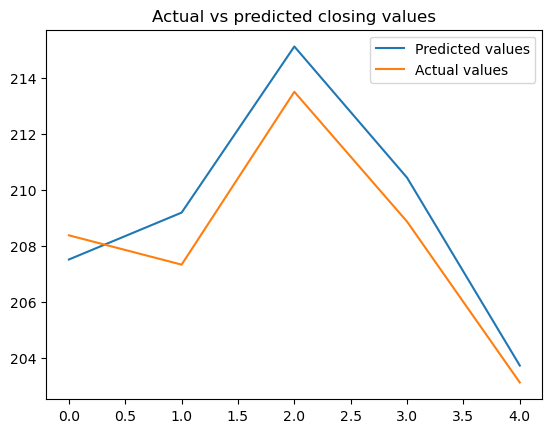

In [310]:
plt.plot(y_pred2,label='Predicted values')
plt.plot(y_test.values,label='Actual values')
plt.title('Actual vs predicted closing values')
plt.legend()
plt.savefig('Actual vs predicted closing price using linear regression')